In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

### 1. Import the data

In [2]:
train_labels = pd.read_csv('train_labels.csv')

In [3]:
train_labels.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [4]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [5]:
train_values = pd.read_csv('train_values.csv')

In [6]:
train_values.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [7]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:
# Create a merged dataframe
merged = pd.merge(left=train_values, right=train_labels,
                  left_on='building_id', right_on='building_id')

### 2. Data Exploration

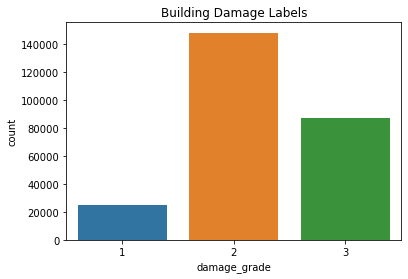

In [9]:
# Visualize the target
sns.countplot(data=merged, x='damage_grade')
plt.title('Building Damage Labels')
plt.show()

In [10]:
# Majority of level 2. Level 1 might need some weights in a model to account for unbalanced structure

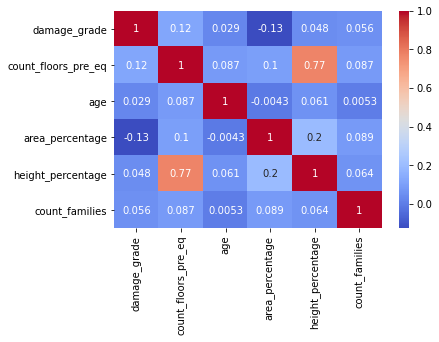

In [11]:
# Visualize correlations with relevant quantitative variables
sns.heatmap(merged[['damage_grade', 'count_floors_pre_eq', 'age',
                    'area_percentage', 'height_percentage', 'count_families']].corr(), cmap='coolwarm', annot=True)
plt.show()

In [12]:
# Positive correlation between number of floors and height makes sense.
# Slight positive correlation between number of floors and damage
# Slight negative correlation between area_perc and damage

In [13]:
# Let's merge some of the categorical binary variables
merged['superstructure'] = merged['has_superstructure_adobe_mud'].apply(
    lambda x: 'am' if x == 1 else '')+merged['has_superstructure_bamboo'].apply(lambda x: 'b' if x == 1 else '')+merged['has_superstructure_bamboo'].apply(lambda x: 'b' if x == 1 else '')+merged['has_superstructure_cement_mortar_brick'].apply(
    lambda x: 'cmb' if x == 1 else '')+merged['has_superstructure_cement_mortar_stone'].apply(lambda x: 'cms' if x == 1 else '')+merged['has_superstructure_mud_mortar_brick'].apply(lambda x: 'mmb' if x == 1 else '')+merged['has_superstructure_mud_mortar_stone'].apply(lambda x: 'mms' if x == 1 else '')+merged['has_superstructure_other'].apply(lambda x: 'o' if x == 1 else '')+merged['has_superstructure_rc_engineered'].apply(lambda x: 'rce' if x == 1 else '')+merged['has_superstructure_rc_non_engineered'].apply(lambda x: 'rcne' if x == 1 else '')+merged['has_superstructure_stone_flag'].apply(lambda x: 'sf' if x == 1 else '')+merged['has_superstructure_timber'].apply(lambda x: 't' if x == 1 else '')

In [14]:
merged['secondary_use'] = merged['has_secondary_use_agriculture'].apply(lambda x: 'ag' if x == 1 else '')+merged['has_secondary_use_gov_office'].apply(lambda x: 'gov' if x == 1 else '')+merged['has_secondary_use_health_post'].apply(lambda x: 'post' if x == 1 else '')+merged['has_secondary_use_hotel'].apply(lambda x: 'hot' if x == 1 else '')+merged['has_secondary_use_industry'].apply(
    lambda x: 'ind' if x == 1 else '')+merged['has_secondary_use_institution'].apply(lambda x: 'inst' if x == 1 else '')+merged['has_secondary_use_other'].apply(lambda x: 'o' if x == 1 else '')+merged['has_secondary_use_rental'].apply(lambda x: 'rent' if x == 1 else '')+merged['has_secondary_use_school'].apply(lambda x: 'sch' if x == 1 else '')+merged['has_secondary_use_use_police'].apply(lambda x: 'pol' if x == 1 else '')

In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

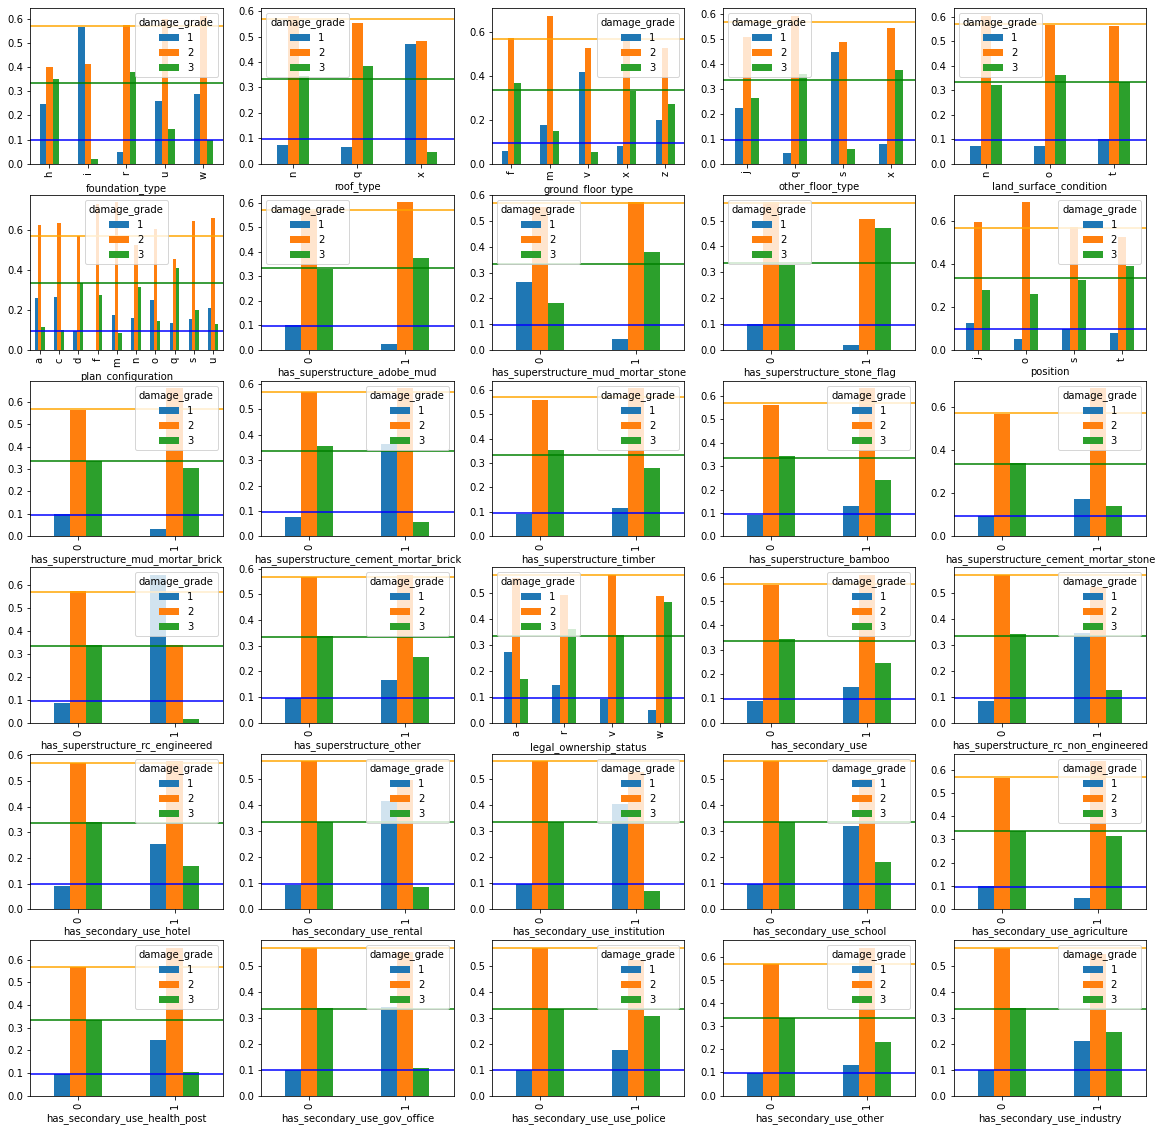

In [16]:
# Let's vizualise for cat variables without combinations
cat = merged.columns[8:27].to_list()+merged.columns[28:39].to_list()
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))
row = 0
col = 0

for var in cat:
    df = pd.crosstab(index=merged['damage_grade'],
                     columns=merged[var], normalize='columns').T
    df.plot(kind='bar', ax=axes[row//5, col % 5-1])
    axes[row//5, col % 5-1].hlines(y=merged['damage_grade'].value_counts(
        normalize=True).loc[1], xmin=axes[row//5, col % 5-1].get_xlim()[0], xmax=axes[row//5, col % 5-1].get_xlim()[1], colors='b')
    axes[row//5, col % 5-1].hlines(y=merged['damage_grade'].value_counts(normalize=True).loc[2],
                                   xmin=axes[row//5, col % 5-1].get_xlim()[0], xmax=axes[row//5, col % 5-1].get_xlim()[1], colors='orange')
    axes[row//5, col % 5-1].hlines(y=merged['damage_grade'].value_counts(normalize=True).loc[3],
                                   xmin=axes[row//5, col % 5-1].get_xlim()[0], xmax=axes[row//5, col % 5-1].get_xlim()[1], colors='green')
    row += 1
    col += 1
plt.show()

In [17]:
# Looking at the above, the variables who don't seem to have much influence are:
# - Land surface condition
# - superstructure variables at the exception of cement_mortar_brick, rc_engineered
# - secondary use in general, secondary use agriculture, secondary use police

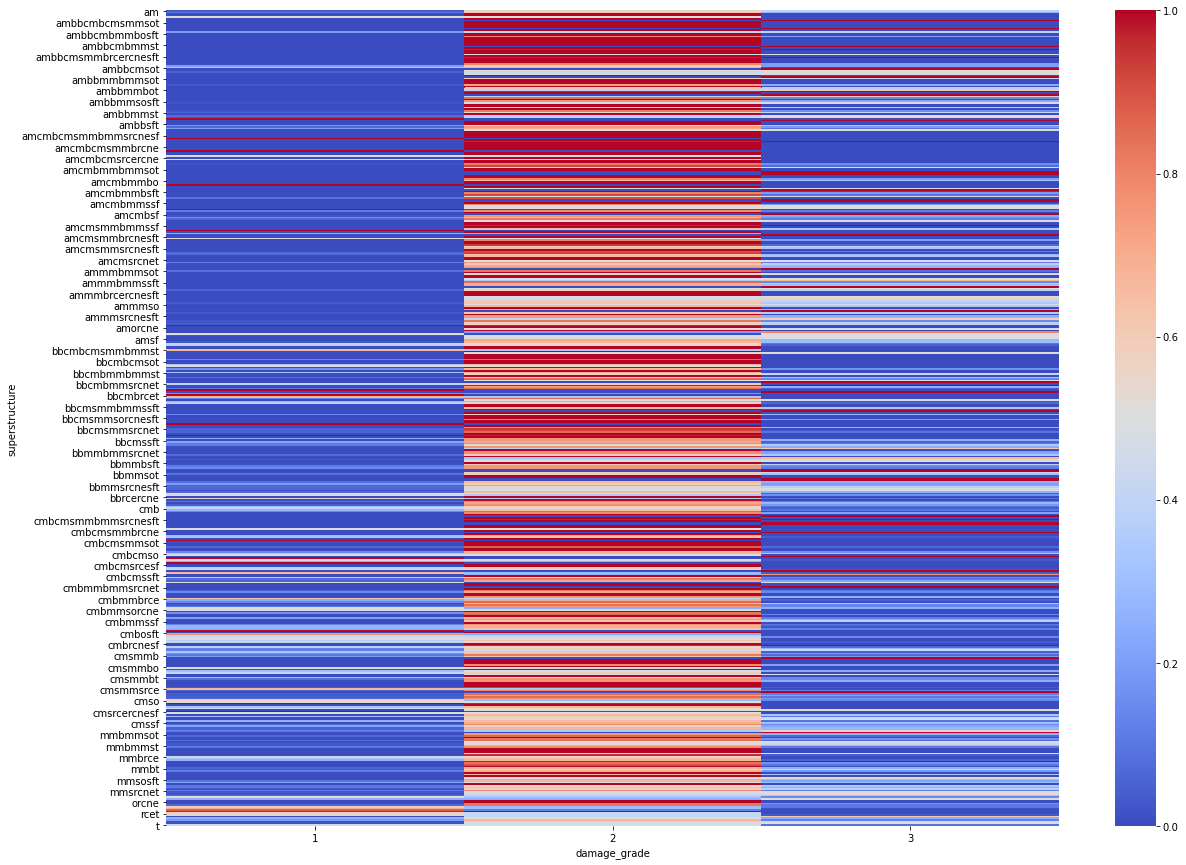

In [18]:
# Let's vizualize for combinations

df = pd.crosstab(index=merged['damage_grade'],
                 columns=merged['superstructure'], normalize='columns').T
plt.subplots(figsize=(20, 15))
sns.heatmap(df, cmap='coolwarm')
plt.show()

In [19]:
# The combination of superstructure seems to indicate more influence than just a superstructure in isolation

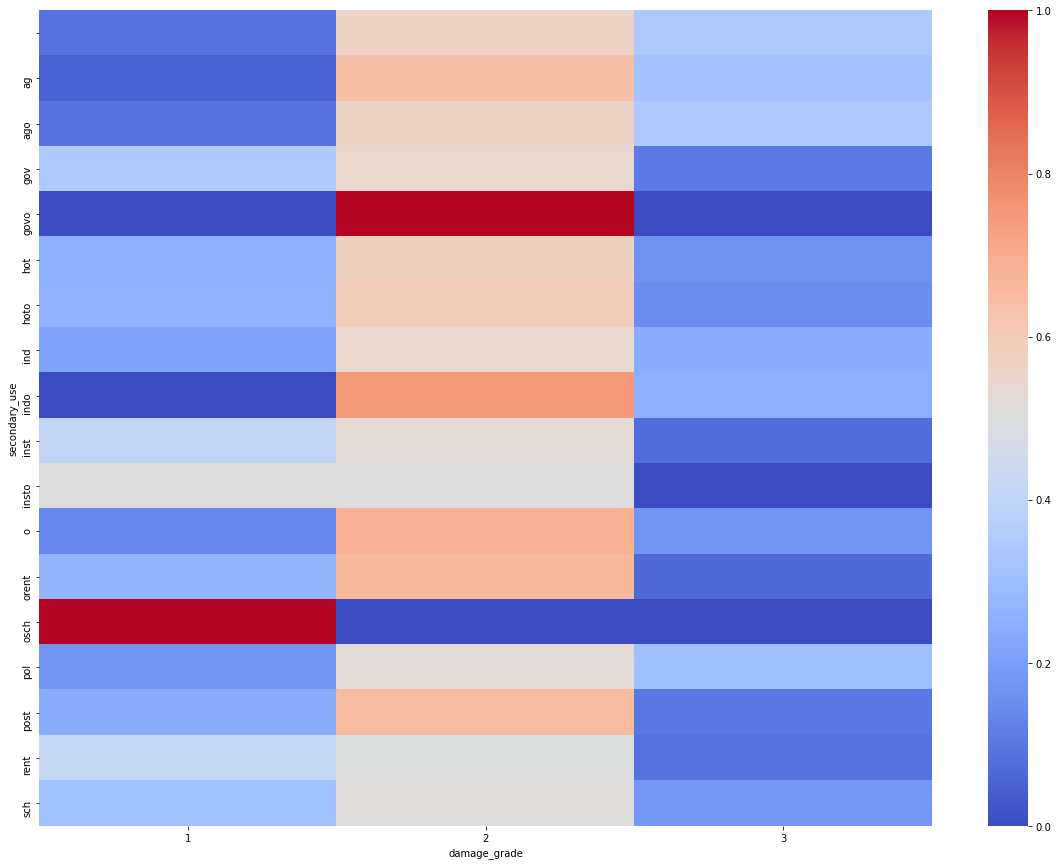

In [20]:
df = pd.crosstab(index=merged['damage_grade'],
                 columns=merged['secondary_use'], normalize='columns').T
plt.subplots(figsize=(20, 15))
sns.heatmap(df, cmap='coolwarm')
plt.show()

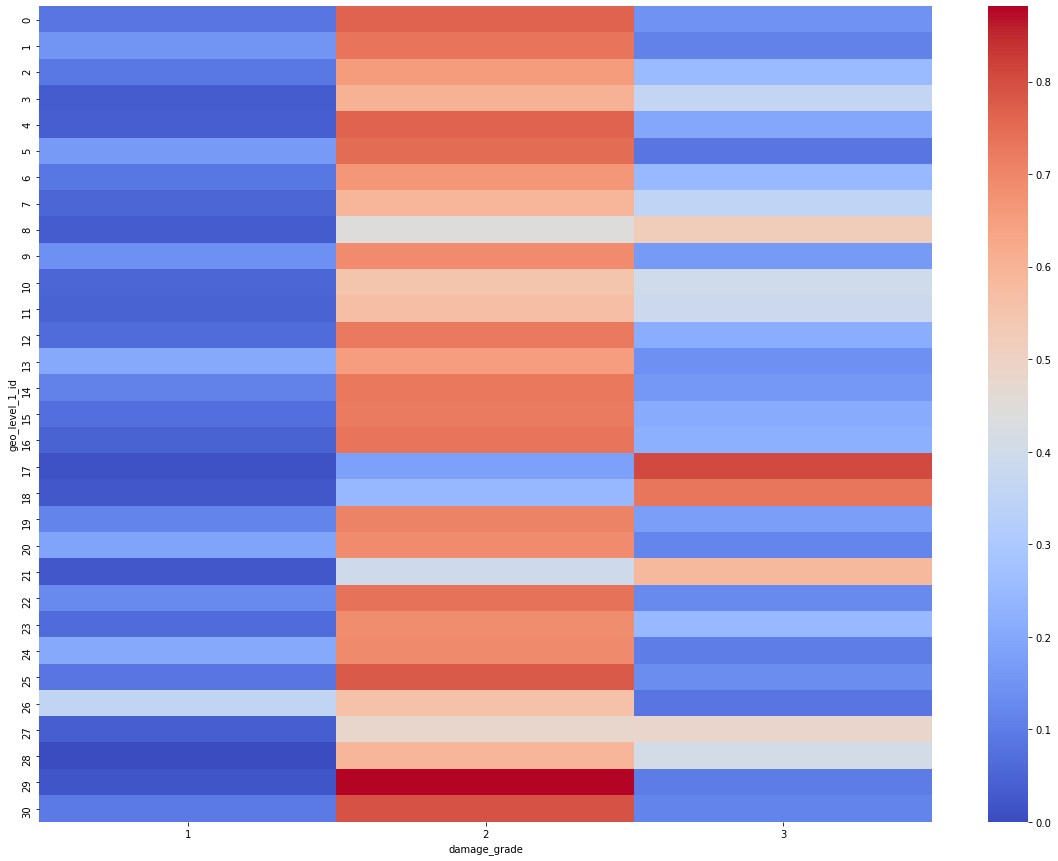

In [21]:
df = pd.crosstab(index=merged['damage_grade'],
                 columns=merged['geo_level_1_id'], normalize='columns').T
plt.subplots(figsize=(20, 15))
sns.heatmap(df, cmap='coolwarm')
plt.show()

### 3. Model

#### a. Random Forest Scikit

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

In [ ]:
# First create X and y
X = merged.drop(['building_id', 'superstructure',
                 'secondary_use', 'damage_grade'], axis=1)

# only keeps geo_level_1 now
X.drop(['geo_level_2_id', 'geo_level_3_id'], axis=1, inplace=True)

y = merged['damage_grade']

In [ ]:
# Creates binary variables for all categorical

cat_to_bin = ['geo_level_1_id','land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
              'plan_configuration', 'legal_ownership_status']

# Specify geo_level_1_id as a string
X['geo_level_1_id']=X['geo_level_1_id'].astype(str)

dumm = pd.get_dummies(X[cat_to_bin])

In [ ]:
# Replace the cat variables by the dummies

X.drop(cat_to_bin, axis=1, inplace=True)
X = pd.merge(left=X, right=dumm, left_index=True, right_index=True)

In [ ]:
# First Random Forest with default parameters

rf = RandomForestClassifier()
cross_val_score(rf, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# Find the best parameters with a quick grid search

from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials, hp

In [ ]:
# Define the objective function

def objective_rf_sk(par):
    rf = RandomForestClassifier(**par)
    f1 = cross_val_score(rf, X, y, cv=3, scoring='f1_micro')
    avg_f1 = f1.mean()
    std_f1 = f1.std()

    # Hyperopt need a function to minimize. We simply multiply by -1 the F1 obtained accross the 3 folds.
    return {'loss': -1*avg_f1, 'status': STATUS_OK, 'parameters': par, 'std': std_f1}

In [ ]:
# Define the parameters space

parameter_space_rf_sk = {'n_estimators': hp.choice('iterations', [100, 200, 300, 400]), 'criterion': hp.choice('criterion', ['gini', 'entropy']),
                         'max_depth': hp.choice('max_depth',[None,hp.quniform('depth', 3, 50, 1)]), 'min_samples_split': hp.choice('min_samples_split',[2,hp.uniform('min_split', 0.01, 0.4)]),
                         'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']), 'n_jobs': -1, 'class_weight': hp.choice('class_weight', [None, 'balanced', 'balanced_subsample'])}

In [ ]:
# # Initiate trial object
# trials = Trials()

In [ ]:
# # Run the random optimization
# opt_rf_sk = fmin(objective_rf_sk, space=parameter_space_rf_sk,
#                  algo=tpe.rand.suggest, trials=trials, max_evals=50)

In [ ]:
# pickle.dump(trials, open("rf_sk_rnd_50.p", "wb"))

In [ ]:
trials_rfskrnd50=pickle.load(open('rf_sk_rnd_50.p','rb'))

In [ ]:
trials_rfskrnd50.best_trial

#### i. Features Engineering

In [ ]:
# Let's see if we can improve the score on our best model at 0.6941 by selecting different features
# First train the best model

rfskrnd50=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
rfskrnd50.fit(X_train,y_train)

In [ ]:
pred_test_rfskrnd50=rfskrnd50.predict(X_test)
f1_score(y_test,pred_test_rfskrnd50,average='micro')

In [ ]:
pred_train_rfskrnd50=rfskrnd50.predict(X_train)
f1_score(y_train,pred_train_rfskrnd50,average='micro')

In [ ]:
# There is some overfitting.
# Let's look at features importance

In [ ]:
rfskrnd50_feat=pd.Series(index=X_train.columns,data=rfskrnd50.feature_importances_).sort_values(ascending=False)

In [ ]:
rfskrnd50_feat[rfskrnd50_feat>0.005]

In [ ]:
# Numerical variables are amongst the most important. Let's try to change the geo_level by going more granular geo indicator

In [ ]:
# First need to remove all geo_level_1:
col_drop=[]
for col in X.columns:
    if 'geo_level_1' in col:
        col_drop.append(col)
X.drop(col_drop,axis=1,inplace=True)

In [ ]:
# Then get dummies and merge with X
X['geo_level_2_id']=merged['geo_level_2_id']
X['geo_level_2_id']=X['geo_level_2_id'].astype(str)
dum=pd.get_dummies(X['geo_level_2_id'],prefix='geo_level_2_id')
X=pd.merge(left=X,right=dum,left_index=True,right_index=True)
X.drop('geo_level_2_id',axis=1,inplace=True)

In [ ]:
# Let's fit our previous rf

rfskrnd50_geo2=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_geo2, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# It seems to decrease the performance 

In [ ]:
# Let's do the same test with geo_3
col_drop=[]
for col in X.columns:
    if 'geo_level_2' in col:
        col_drop.append(col)
X.drop(col_drop,axis=1,inplace=True)
X['geo_level_3_id']=merged['geo_level_3_id']
X['geo_level_3_id']=X['geo_level_3_id'].astype(str)
dum=pd.get_dummies(X['geo_level_3_id'],prefix='geo_level_3_id')
X=pd.merge(left=X,right=dum,left_index=True,right_index=True)
X.drop('geo_level_3_id',axis=1,inplace=True)

In [ ]:
rfskrnd50_geo3=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_geo3, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# Even worst

In [ ]:
# feat to try:
# - number of families vs size of the building: floor/fam number, are/fam number, heigth/fam number, area*height/fam
# - is it tall floors or not ? height/floor

In [ ]:
# Let's now try floor/fam number

# First put back geo_1
col_drop=[]
for col in X.columns:
    if 'geo_level_3' in col:
        col_drop.append(col)
X.drop(col_drop,axis=1,inplace=True)
X['geo_level_1_id']=merged['geo_level_1_id']
X['geo_level_1_id']=X['geo_level_1_id'].astype(str)
dum=pd.get_dummies(X['geo_level_1_id'],prefix='geo_level_1_id')
X=pd.merge(left=X,right=dum,left_index=True,right_index=True)
X.drop('geo_level_1_id',axis=1,inplace=True)

# Then create new feature
X['floor/fam']=X['count_floors_pre_eq']/X['count_families']

In [ ]:
# Replace infinity by 0
X['floor/fam'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_floorfam=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_floorfam, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# We are not far from the base without relaunching some tuning of parameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_floorfam.fit(X_train,y_train)
rfskrnd50_floorfam_feat=pd.Series(index=X_train.columns,data=rfskrnd50_floorfam.feature_importances_).sort_values(ascending=False)
rfskrnd50_floorfam_feat[rfskrnd50_floorfam_feat>0.005]

In [ ]:
# Let's try area/fam

X.drop('floor/fam',axis=1,inplace=True)
X['area/fam']=X['area_percentage']/X['count_families']

In [ ]:
X['area/fam'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_areafam=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_areafam, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# We are not far from the base without relaunching some tuning of parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_areafam.fit(X_train,y_train)
rfskrnd50_areafam_feat=pd.Series(index=X_train.columns,data=rfskrnd50_areafam.feature_importances_).sort_values(ascending=False)
rfskrnd50_areafam_feat[rfskrnd50_areafam_feat>0.005]

In [ ]:
# Let's try height/fam
X.drop('area/fam',axis=1,inplace=True)
X['height/fam']=X['height_percentage']/X['count_families']
X['height/fam'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_heightfam=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_heightfam, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# Slight improvement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_heightfam.fit(X_train,y_train)
rfskrnd50_heightfam_feat=pd.Series(index=X_train.columns,data=rfskrnd50_heightfam.feature_importances_).sort_values(ascending=False)
rfskrnd50_heightfam_feat[rfskrnd50_heightfam_feat>0.005]

In [ ]:
# Let's try area*height/fam
X.drop('height/fam',axis=1,inplace=True)
X['areaheight/fam']=(X['height_percentage']*X['area_percentage'])/X['count_families']
X['areaheight/fam'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_areaheightfam=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_areaheightfam, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# Not far from base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_areaheightfam.fit(X_train,y_train)
rfskrnd50_areaheightfam_feat=pd.Series(index=X_train.columns,data=rfskrnd50_areaheightfam.feature_importances_).sort_values(ascending=False)
rfskrnd50_areaheightfam_feat[rfskrnd50_areaheightfam_feat>0.005]

In [ ]:
# Let's try height/floor
X.drop('areaheight/fam',axis=1,inplace=True)
X['height/floor']=X['height_percentage']/X['count_floors_pre_eq']
X['height/floor'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_heightfloor=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_heightfloor, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# Best improvement so far
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_heightfloor.fit(X_train,y_train)
rfskrnd50_heightfloor_feat=pd.Series(index=X_train.columns,data=rfskrnd50_heightfloor.feature_importances_).sort_values(ascending=False)
rfskrnd50_heightfloor_feat[rfskrnd50_heightfloor_feat>0.005]

In [ ]:
# Let's try to hypertune with the new features which did not deteriorate the perf or were close to the baseline score.
# RF should be quite unsensitive to useless features

X['areaheight/fam']=(X['height_percentage']*X['area_percentage'])/X['count_families']
X['areaheight/fam'].replace(to_replace=np.inf,value=0,inplace=True)
X['height/fam']=X['height_percentage']/X['count_families']
X['height/fam'].replace(to_replace=np.inf,value=0,inplace=True)
X['area/fam']=X['area_percentage']/X['count_families']
X['area/fam'].replace(to_replace=np.inf,value=0,inplace=True)
X['floor/fam']=X['count_floors_pre_eq']/X['count_families']
X['floor/fam'].replace(to_replace=np.inf,value=0,inplace=True)


In [ ]:
# Run the random optimization
trials_rfskrnd50feateng=Trials()
opt_rfskfeateng = fmin(objective_rf_sk, space=parameter_space_rf_sk,
                 algo=tpe.rand.suggest, trials=trials_rfskrnd50feateng, max_evals=100)

#### b. Random Forest H2O

In [ ]:
# H2O implementation of RF enables to perform separation of categorical variables as opposed to scikit which can only handle binary split

In [23]:
import h2o

In [24]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\mrnpe\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\mrnpe\AppData\Local\Temp\tmpd33sxs4p
  JVM stdout: C:\Users\mrnpe\AppData\Local\Temp\tmpd33sxs4p\h2o_mrnpe_started_from_python.out
  JVM stderr: C:\Users\mrnpe\AppData\Local\Temp\tmpd33sxs4p\h2o_mrnpe_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.2
H2O_cluster_version_age:    7 days, 17 hours and 56 minutes
H2O_cluster_name:           H2O_from_python_mrnpe_1ne6hx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    14.21 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.8 final
--------------------------  ---------------------------------------------------------

In [25]:
from h2o.estimators import H2ORandomForestEstimator

In [ ]:
f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator()
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')
    
    
    

In [ ]:
# Better results than the Scikit RF and not too much overfitting

In [ ]:
# Let's now try again but this time we use geo_level_2_id
f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_1_id','geo_level_3_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_1_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_2_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_2_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator(nbins_cats=1414)
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')


In [ ]:
# Performance is increased but there is more overfitting. There are also pb of unseen values during the training.
# Let's try with geo_level_id_3

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_1_id','geo_level_2_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_1_id','geo_level_2_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator(nbins_cats=11595)
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')

In [ ]:
# slightly better with more overfitting
# let's now try with height/floor variable and geolevel 1

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

merged['height/floor']=merged['height_percentage']/merged['count_floors_pre_eq']
merged['height/floor'].replace(to_replace=np.inf,value=0,inplace=True)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator()
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')


In [ ]:
# Minor improvement but the overfitting does not increase much
# Let's now try height/fam

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

merged['height/fam']=merged['height_percentage']/merged['count_families']
merged['height/fam'].replace(to_replace=np.inf,value=0,inplace=True)
merged.drop('height/floor',axis=1,inplace=True)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator()
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')

In [ ]:
# Slight deterioration
# Let's now try with our 2 best new features height/floor and geo_level_3

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

merged['height/floor']=merged['height_percentage']/merged['count_floors_pre_eq']
merged['height/floor'].replace(to_replace=np.inf,value=0,inplace=True)
merged.drop('height/fam',axis=1,inplace=True)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator(nbins_cats=11595)
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')

In [ ]:
# The improvement is marginal when adding height/floor
# Let's now try with superstructure and geo_level_1

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)
merged.drop('height/floor',axis=1,inplace=True)
to_drop=[]
for col in merged.columns:
    if 'has_super' in col:
        to_drop.append(col)
merged_super=merged.drop(to_drop,axis=1)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged_super.drop('damage_grade',axis=1),merged_super['damage_grade']):
    data_train=merged_super.loc[train].drop(['building_id','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_test=merged_super.loc[test].drop(['building_id','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator(nbins_cats=505)
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')


In [ ]:
# marginal improvement. Let's try with secondary use
f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)
to_drop=[]
for col in merged.columns:
    if 'has_secondary' in col:
        to_drop.append(col)
merged_secondary=merged.drop(to_drop,axis=1)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged_secondary.drop('damage_grade',axis=1),merged_secondary['damage_grade']):
    data_train=merged_secondary.loc[train].drop(['building_id','geo_level_2_id','superstructure','geo_level_3_id'],axis=1)
    data_test=merged_secondary.loc[test].drop(['building_id','geo_level_2_id','superstructure','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator()
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')


In [ ]:
# Marginal improvement.

# Conclusion is that only the inclusion of geo_level_3 seems to improve perf but leads to overfitting. 
# Let's try to tune the hyperparameters with the model with geo_3
# we have overfitting. So we are going to search with parameters which could decrease overfitting

In [ ]:
# # Let's try a quick tuning of parameters

# def objective_rf_h2o_geo3(par):
#     f1_test=[]
#     # Split the data with a 3 fold approach:
#     for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
#         data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
#         data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
#         data_train=h2o.H2OFrame(data_train,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
#         data_test=h2o.H2OFrame(data_test,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
#         x=data_train.names
#         x.remove('damage_grade')
#         y='damage_grade'
#         rf_h2o=H2ORandomForestEstimator(**par)
#         rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
#         predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
#         test=data_test.as_data_frame()['damage_grade']
#         f1_test.append(f1_score(test,predictions,average='micro'))
      
#     f1_test=np.array(f1_test).mean()
#     std_f1=np.array(f1_test).std()
#     # Hyperopt need a function to minimize. We simply multiply by -1 the F1 obtained accross the 3 folds.
#     return {'loss': -1*f1_test, 'status': STATUS_OK, 'parameters': par, 'std': std_f1}

In [ ]:
# # Define the parameters space

# parameter_space_rf_h2o = {'balance_classes': hp.choice('balance_classes', [False, True]), 'ntrees': hp.choice('ntrees', [50,100]),
#                          'max_depth': hp.randint('max_depth', 10, 30), 'min_rows': hp.quniform('min_rows', 1, 50,1),'nbins_cats':hp.choice('nbins_cats',[2000,5000,7000,9000,12000])}

In [ ]:
# # Run the random optimization
# trials = Trials()
# opt_rf_h2o = fmin(objective_rf_h2o_geo3, space=parameter_space_rf_h2o,
#                  algo=tpe.rand.suggest, trials=trials, max_evals=50)

In [ ]:
# # Not much improvement after 25 iterations. Let's look at the effect of nbins_cats
# bin_cats=[]
# loss=[]
# for result in trials.results:
#     bin_cats.append(result['parameters']['nbins_cats'])
#     loss.append(result['loss'])

In [ ]:
# plt.scatter(x=bin_cats,y=loss)

In [ ]:
# # for max_depth
# depth=[]
# loss=[]
# for result in trials.results:
#     depth.append(result['parameters']['max_depth'])
#     loss.append(result['loss'])
# plt.scatter(x=depth,y=loss)

In [ ]:
# trials.best_trial

In [26]:
# # Let's try a submission on our best model
# # first we will refit the model with whole dataset

# rf_h2o_best=H2ORandomForestEstimator(max_depth=16,min_rows=7,nbins_cats=12000)
# data=merged.drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
# data=h2o.H2OFrame(data,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
# x=data.names
# x.remove('damage_grade')
# y='damage_grade'
# rf_h2o_best.train(x=x,y=y,training_frame=data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [53]:
# submission=pd.read_csv('test_values.csv')

In [54]:
# submission.drop(['building_id','geo_level_1_id','geo_level_2_id'],axis=1,inplace=True)

In [55]:
# submission=h2o.H2OFrame(submission,column_types={'geo_level_3_id':'factor'})

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [56]:
# submission= rf_h2o_best.predict(submission).as_data_frame()

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\mrnpe\Anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset column 'geo_level_3_id' has levels not trained on: ["10040", "10100", "10124", "10147", "10148", "10367", "10378", "10492", "10584", "10620", ...246 not listed..., "9537", "9558", "9604", "9687", "9702", "9790", "9796", "9833", "988", "9924"]
  warnings.warn(w)


In [61]:
# file=pd.DataFrame({'building_id':pd.read_csv('test_values.csv')['building_id'],'damage_grade':submission['predict']})

In [64]:
# file.to_csv('submission_rf_h2o.csv',index=False)

In [ ]:
# Score 0.7474 reaching 151 out of 4180

#### C. Gradient Boosting

#### i. Catboost

In [65]:
from catboost import CatBoostClassifier

In [76]:
# Split the data with a 3 fold approach:
skf=StratifiedKFold(n_splits=3)
f1_test=[]
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    X_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id','damage_grade'],axis=1)
    X_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id','damage_grade'],axis=1)
    y_train=merged.loc[train]['damage_grade']
    y_test=merged.loc[test]['damage_grade']
    
    cat_feat_loc = []
    for col in X_train.select_dtypes('object').columns:
        cat_feat_loc.append(X_train.columns.get_loc(col))

    cat=CatBoostClassifier(n_estimators=8000,eval_metric='TotalF1:average=Micro', task_type='GPU',cat_features=cat_feat_loc, early_stopping_rounds=200)
    cat.fit(X_train, y_train, eval_set=(X_test, y_test),use_best_model=True, logging_level='Silent',plot=True)
    predictions=cat.predict(X_test)

    f1_test.append(f1_score(y_test,predictions,average='micro'))
      
f1_test=np.array(f1_test).mean()
std_f1=np.array(f1_test).std()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [74]:
f1_test

0.6407304653474085